# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
print(cities)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
rrow = []
rrows = [['city','lon','lat','temp','temp_max','humidity','wind_speed','%_cloud_cover']]

for counter,tcity in enumerate(cities):
    print(counter)
    print(tcity)
    
    quereyurl = f"https://api.openweathermap.org/data/2.5/weather?q={tcity}&units=imperial&appid={weather_api_key}" 
    weatherresults = requests.get(quereyurl)
    weatherresults = weatherresults.json()
    try:
        rrow.append(weatherresults['name'])
        rrow.append(weatherresults['coord']['lon'])
        rrow.append(weatherresults['coord']['lat'])
        rrow.append(weatherresults['main']['temp'])
        rrow.append(weatherresults['main']['temp_max'])
        rrow.append(weatherresults['main']['humidity'])
        rrow.append(weatherresults['wind']['speed'])
        rrow.append(weatherresults['clouds']['all'])
        rrows.append(rrow)
        rrow = []
    except:
        print('city error, moving on')
        rrow = []
with open('../weather_csv', 'w', encoding='UTF8') as f:
     writer = csv.writer(f)
     writer.writerows(rrows)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
#csv exported above, now pulling from the csv to avoid continuous city randomization

df = pd.read_csv('weatherfinal.csv')
weather = pd.DataFrame(df)




## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [15]:
weather.humidity.max()

100

In [ ]:
#  Get the indices of cities that have humidity over 100%.
#max humidity is 100, no indicies to drop

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

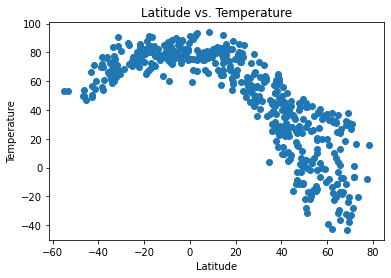

In [3]:
plt.scatter(weather['lat'], weather['temp'])

plt.title("Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature")

plt.savefig("all_lat_v_temp.png")

plt.show()

Graph shows highest temperature correlates to cities closest to the equator. Additionally, it is Northern Hemisphere Winter/Southern Hemisphere Summer so cities <0 degrees Latitude show higher average temperatures compared to cities >0 degrees Latitude.

## Latitude vs. Humidity Plot

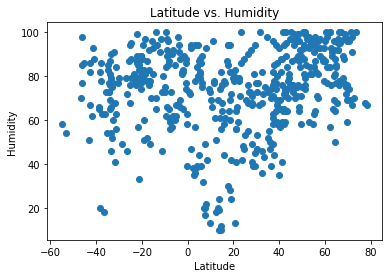

In [4]:
plt.scatter(weather['lat'], weather['humidity'])

plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.savefig("all_lat_v_humid.png")

plt.show()

Graph shows most cities have a humidity level of 60 or greater but that has little correlation to their Latitude. There is a small clustering of low humidity cities between 0 and 20 degrees Latitude but it is unknown if this is of any significance.

## Latitude vs. Cloudiness Plot

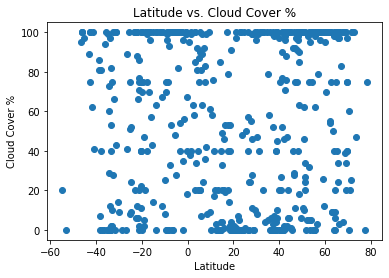

In [5]:
plt.scatter(weather['lat'], weather['%_cloud_cover'])

plt.title("Latitude vs. Cloud Cover %")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover %")

plt.savefig("all_lat_v_cloud.png")

plt.show()

Cloud Cover % is a rough estimate with data points grouped around frequencies of ten causing the horizontal lines on the chart. However, a portion of the data groups near 100% and nother groups near 0%. Neither grouping seems to have a strong relationship to lattitude

## Latitude vs. Wind Speed Plot

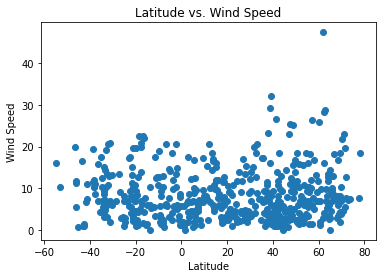

city             Paamiut
lon             -49.6678
lat               61.994
temp               37.65
temp_max           37.65
humidity              84
wind_speed          47.4
%_cloud_cover        100
Name: 192, dtype: object

In [6]:
plt.scatter(weather['lat'], weather['wind_speed'])

plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.savefig("all_lat_v_wind.png")

plt.show()

weather.iloc[weather['wind_speed'].idxmax()]

Most cities have windspeeds under 10 mph which does nto appear to have a relationship to their Latitudes. The data does have a particular outlier in the city of Paamiut, Greenland which has a windspeed of 47.4 mph.

## Linear Regression

In [7]:
#split data into Northern and Southern Hemispheres

shweather = weather[weather.lat < 0]
nhweather = weather[weather.lat > 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

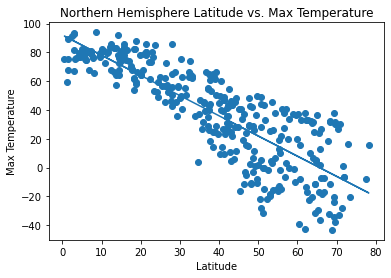

In [8]:
plt.scatter(nhweather['lat'], nhweather['temp_max'])

plt.title("Northern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

m, b = np.polyfit(nhweather['lat'], nhweather['temp_max'], 1)
plt.plot(nhweather['lat'], m*nhweather['lat']+b)

plt.savefig("nh_lat_v_temp.png")

plt.show()



The linear regression shows the expected strong relationship between latitude and max temperature. As cities move away from the Equator (Latitude 0) and towards the North Pole (Latitude 90), temperature decreases.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

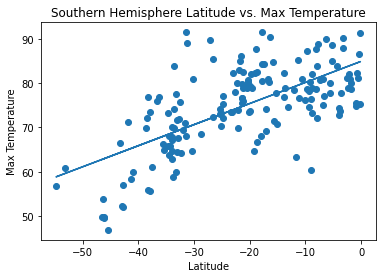

In [9]:
plt.scatter(shweather['lat'], shweather['temp_max'])

plt.title("Southern Hemisphere Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

m, b = np.polyfit(shweather['lat'], shweather['temp_max'], 1)
plt.plot(shweather['lat'], m*shweather['lat']+b)

plt.savefig("sh_lat_v_temp.png")

plt.show()


The linear regression shows the same relationship of temperatures decreasing moving towards the pole. The grouping around the line seems weaker but this is likely due to less data points for the Southern Hemishpere vs. Norther Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

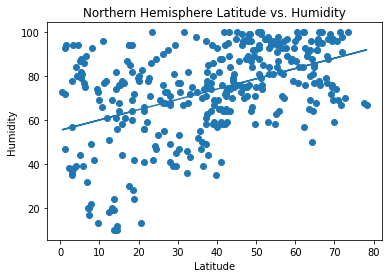

In [10]:
plt.scatter(nhweather['lat'], nhweather['humidity'])

plt.title("Northern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

m, b = np.polyfit(nhweather['lat'], nhweather['humidity'], 1)
plt.plot(nhweather['lat'], m*nhweather['lat']+b)

plt.savefig("nh_lat_v_humid.png")

plt.show()

There appears to be a loose fit between Latitude and Humidity in the Northern Hemisphere but based on the pervious plot of both Hemisphere combined this may be circumstantial based on our data set.  

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

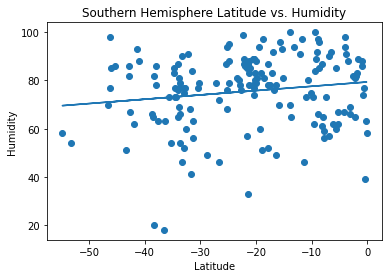

In [11]:
plt.scatter(shweather['lat'], shweather['humidity'])

plt.title("Southern Hemisphere Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

m, b = np.polyfit(shweather['lat'], shweather['humidity'], 1)
plt.plot(shweather['lat'], m*shweather['lat']+b)

plt.savefig("sh_lat_v_humid.png")

plt.show()

Here we see an even weaker relationship between latitude and humidity in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

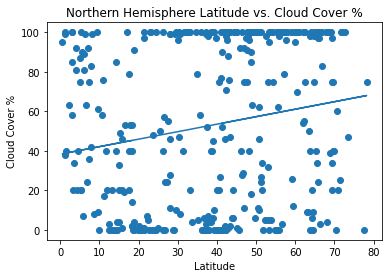

In [12]:
plt.scatter(nhweather['lat'], nhweather['%_cloud_cover'])

plt.title("Northern Hemisphere Latitude vs. Cloud Cover %")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover %")

m, b = np.polyfit(nhweather['lat'], nhweather['%_cloud_cover'], 1)
plt.plot(nhweather['lat'], m*nhweather['lat']+b)

plt.savefig("nh_lat_v_cloud.png")

plt.show()

There is a very weak relationship between Latitude and Cloud Cover %. Plot is skewed by the high number of outliers.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

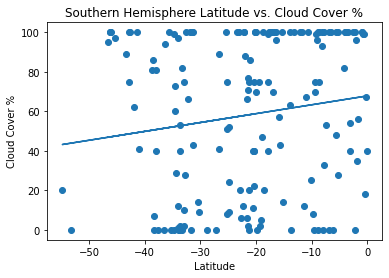

In [13]:
plt.scatter(shweather['lat'], shweather['%_cloud_cover'])

plt.title("Southern Hemisphere Latitude vs. Cloud Cover %")
plt.xlabel("Latitude")
plt.ylabel("Cloud Cover %")

m, b = np.polyfit(shweather['lat'], shweather['%_cloud_cover'], 1)
plt.plot(shweather['lat'], m*shweather['lat']+b)

plt.savefig("sh_lat_v_cloud.png")

plt.show()

There is a very weak relationship between Latitude and Cloud Cover %. Plot is skewed by the high number of outliers.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

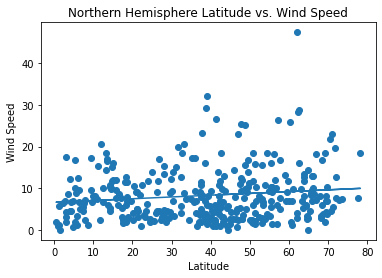

In [14]:
plt.scatter(nhweather['lat'], nhweather['wind_speed'])

plt.title("Northern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

m, b = np.polyfit(nhweather['lat'], nhweather['wind_speed'], 1)
plt.plot(nhweather['lat'], m*nhweather['lat']+b)

plt.savefig("nh_lat_v_wind.png")

plt.show()

There is minimal relationship between wind speed and latitude.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

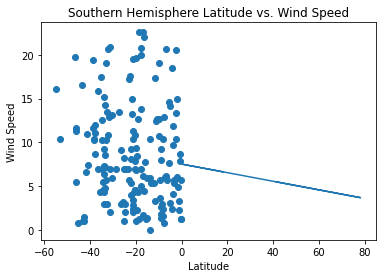

In [15]:
plt.scatter(shweather['lat'], shweather['wind_speed'])

plt.title("Southern Hemisphere Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

m, b = np.polyfit(shweather['lat'], shweather['wind_speed'], 1)
plt.plot(nhweather['lat'], m*nhweather['lat']+b)

plt.savefig("sh_lat_v_wind.png")

plt.show()